<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("50_Startups.csv")

In [ ]:
data.shape

(50, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [ ]:
x = data[['PROFIT']]

In [ ]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

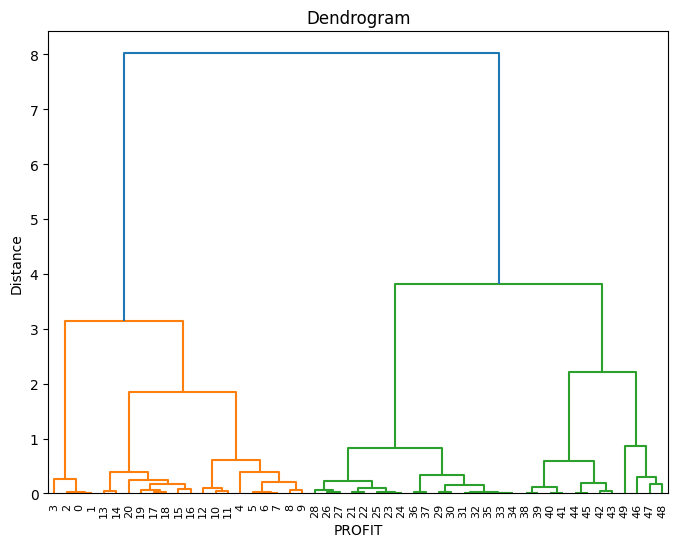

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8,6))
plt.title("Dendrogram")
plt.xlabel("PROFIT")
plt.ylabel("Distance")
dend = shc.dendrogram(shc.linkage(x_scaled,method="ward"))

In [ ]:
#From above figure we can determine the no. of clusters are 2

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
pred=cluster.fit_predict(x_scaled)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
data['cluster']=pred

In [ ]:
data.head()

,RND,ADMIN,MKT,STATE,PROFIT,cluster
0,165349.20,136897.80,471784.10,New York,192261.83,1
1,162597.70,151377.59,443898.53,California,191792.06,1
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1


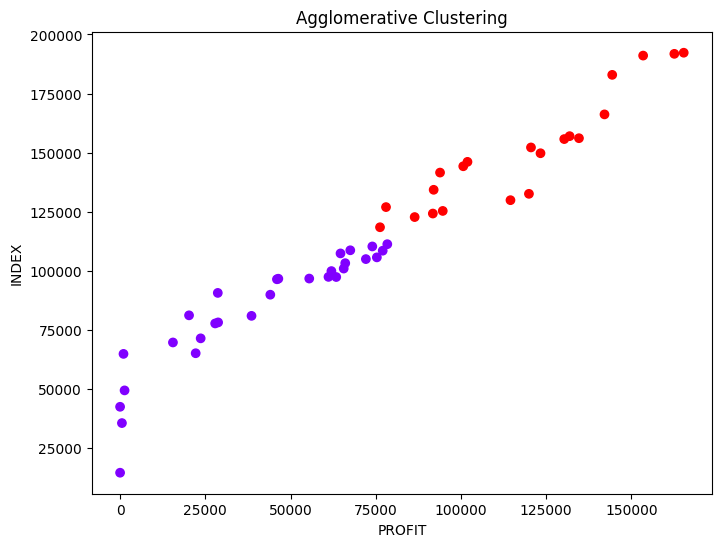

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data['RND'],x,c=data['cluster'],cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("PROFIT")
plt.ylabel("INDEX")
plt.show()